In [ ]:
!pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install model-card-toolkit --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 8.0 MB/s eta 0:00:00
  Using cached pyfarmhash-0.3.2.tar.gz (99 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

Training MSE: 2.320666666660391e-09
Test MSE: 1.7405000212366218e-09
Model Card HTML saved to: model_card.html


Name,Value
MeanSquaredError,1.7405000212366218e-09

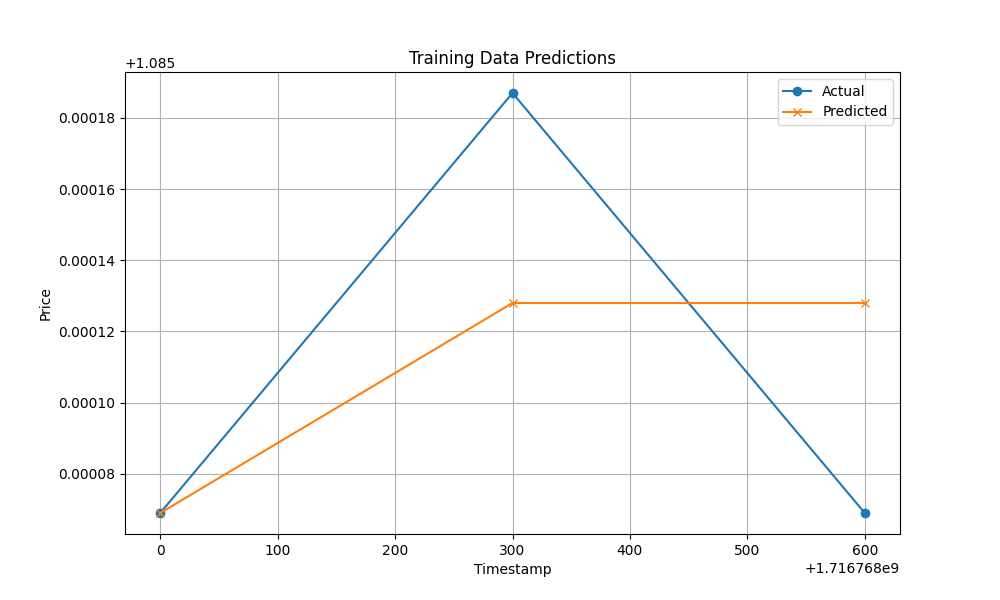
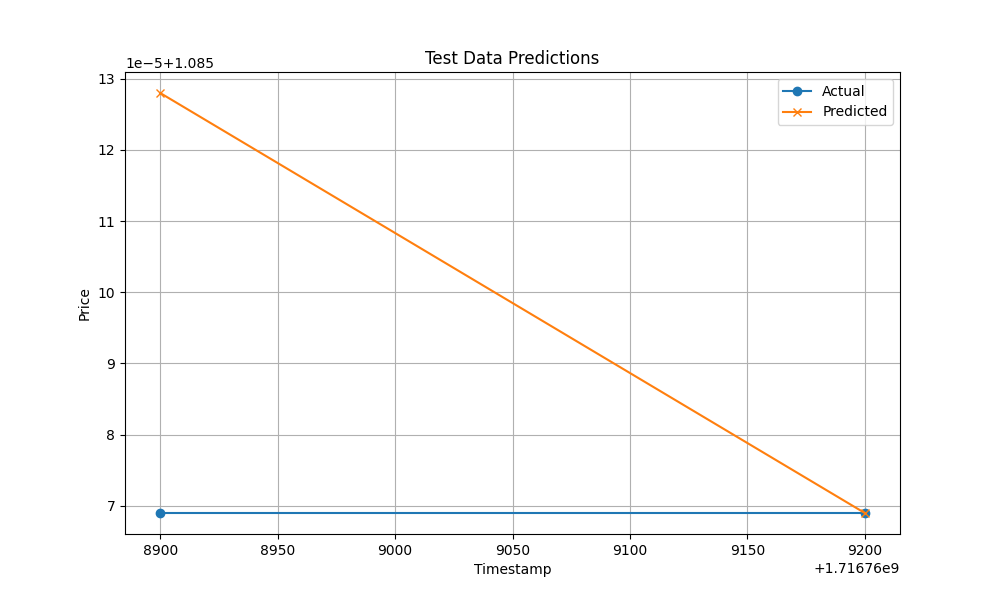
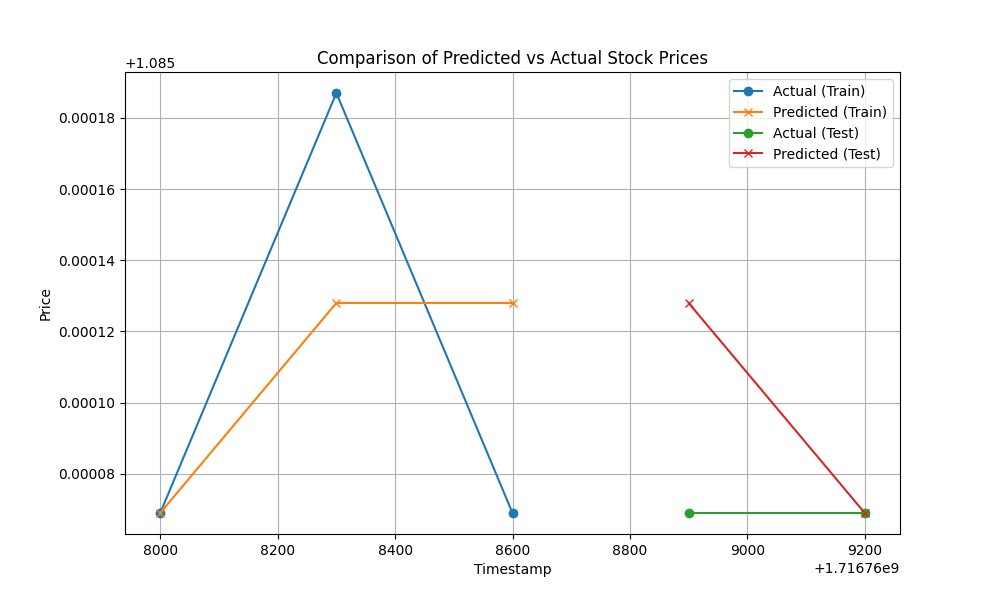

In [ ]:
import uuid
from datetime import date
import matplotlib.pyplot as plt
import os
import base64
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import model_card_toolkit as mct

# 1. Prepare Sample Dataset
# Using example stock prices dataset (Open, High, Low, Close)
data = pd.DataFrame([
    {"timestamp": 1716768000, "open": 1.084951, "high": 1.085069, "low": 1.084951, "close": 1.085069},
    {"timestamp": 1716768300, "open": 1.085187, "high": 1.085187, "low": 1.085069, "close": 1.085187},
    {"timestamp": 1716768600, "open": 1.085187, "high": 1.085187, "low": 1.085069, "close": 1.085069},
    {"timestamp": 1716768900, "open": 1.085187, "high": 1.085187, "low": 1.085069, "close": 1.085069},
    {"timestamp": 1716769200, "open": 1.085069, "high": 1.085069, "low": 1.085069, "close": 1.085069},
])

# Features (Open, High, Low)
X = data[['open', 'high', 'low']]
# Target (Close)
y = data['close']

# Split data into train and test sets (using first 3 rows for training, last 2 for testing)
X_train, X_test = X[:3], X[3:]
y_train, y_test = y[:3], y[3:]

# 2. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Model Prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 4. Evaluation (Mean Squared Error)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# 5. Plotting Predictions vs Actual Values
def plot_predictions(timestamps, actual, predicted, title, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, actual, label='Actual', marker='o')
    plt.plot(timestamps, predicted, label='Predicted', marker='x')
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Save plot
    plot_path = f'plots/{filename}.png'
    plt.savefig(plot_path)
    plt.close()

    return plot_path

# Create directory for plots if not exists
if not os.path.exists('plots'):
    os.makedirs('plots')

# Plot training data predictions
train_plot_path = plot_predictions(data['timestamp'][:3], y_train, y_pred_train, 'Training Data Predictions', 'train_plot')

# Plot test data predictions
test_plot_path = plot_predictions(data['timestamp'][3:], y_test, y_pred_test, 'Test Data Predictions', 'test_plot')

# Plot comparison between predicted and actual for both train and test data
def plot_comparison(timestamps_train, actual_train, predicted_train,
                    timestamps_test, actual_test, predicted_test, filename):
    plt.figure(figsize=(10, 6))
    # Train data
    plt.plot(timestamps_train, actual_train, label='Actual (Train)', marker='o')
    plt.plot(timestamps_train, predicted_train, label='Predicted (Train)', marker='x')
    # Test data
    plt.plot(timestamps_test, actual_test, label='Actual (Test)', marker='o')
    plt.plot(timestamps_test, predicted_test, label='Predicted (Test)', marker='x')

    plt.title('Comparison of Predicted vs Actual Stock Prices')
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Save plot
    plot_path = f'plots/{filename}.png'
    plt.savefig(plot_path)
    plt.close()

    return plot_path

# Generate the comparison plot
comparison_plot_path = plot_comparison(
    data['timestamp'][:3], y_train, y_pred_train,
    data['timestamp'][3:], y_test, y_pred_test,
    'comparison_plot'
)

# Convert image file to Base64
def image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

train_plot_base64 = image_to_base64(train_plot_path)
test_plot_base64 = image_to_base64(test_plot_path)
comparison_plot_base64 = image_to_base64(comparison_plot_path)  # Base64 for comparison plot

# 6. Generate Model Card
toolkit = mct.ModelCardToolkit()

# Create a new model card scaffold
model_card = toolkit.scaffold_assets()

# Add Model Details
model_card.model_details.name = 'Stock Price Prediction Model'
model_card.model_details.overview = (
    'This model predicts the closing price of a stock based on historical open, high, low, and close prices.'
)

model_card.model_details.owners = [
    mct.Owner(name='Data Science Team', contact='datascience@finance.com')
]

model_card.model_details.references = [
    mct.Reference(reference='https://scikit-learn.org/stable/')
]

model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

# Add Ethical Considerations
model_card.considerations.limitations = [
    mct.Limitation(description='This model does not account for external factors like market news or financial events.')
]

model_card.considerations.use_cases = [
    mct.UseCase(description='Stock price prediction for short-term trading.')
]

model_card.considerations.users = [
    mct.User(description='Financial analysts'),
    mct.User(description='Traders')
]

# Add Dataset Information
model_card.model_parameters.data.append(
    mct.Dataset(
        graphics=mct.GraphicsCollection(
            description=f'{len(X_train)} rows with 3 features (open, high, low)',
            collection=[
                mct.Graphic(image=train_plot_base64),
            ]
        )
    )
)

model_card.model_parameters.data.append(
    mct.Dataset(
        graphics=mct.GraphicsCollection(
            description=f'{len(X_test)} rows with 3 features (open, high, low)',
            collection=[
                mct.Graphic(image=test_plot_base64),
            ]
        )
    )
)

# Add Performance Metrics
model_card.quantitative_analysis.performance_metrics = [
    mct.PerformanceMetric(type='MeanSquaredError', value=str(test_mse))
]

# Performance Plots (Predicted vs Actual)
model_card.quantitative_analysis.graphics = mct.GraphicsCollection(
    description='Comparison of predicted vs actual stock prices',
    collection=[
        mct.Graphic(image=comparison_plot_base64)  # Insert comparison plot Base64 here
    ]
)

# Finalize and generate the model card
toolkit.update_model_card(model_card)

# Export the model card as HTML content
html_content = toolkit.export_format()

# Save the HTML content to a file
html_file_path = 'model_card.html'
with open(html_file_path, 'w') as f:
    f.write(html_content)

print(f"Model Card HTML saved to: {html_file_path}")

# Display Model Card in Notebook (for Jupyter)
from IPython.display import display, HTML
display(HTML(html_content))


Model Card HTML saved to: model_card.html


Name,Value
Linear Regression MeanSquaredError,1.7405000212366218e-09
Linear Regression MeanAbsoluteError,2.9503258433538626e-05
Ridge Regression MeanSquaredError,1.5471111326531005e-09
Ridge Regression MeanAbsoluteError,3.933333360717217e-05
Lasso Regression MeanSquaredError,1.5471111111069275e-09
Lasso Regression MeanAbsoluteError,3.933333333328015e-05
Decision Tree MeanSquaredError,1.7405000000018437e-09
Decision Tree MeanAbsoluteError,2.9500000000015625e-05

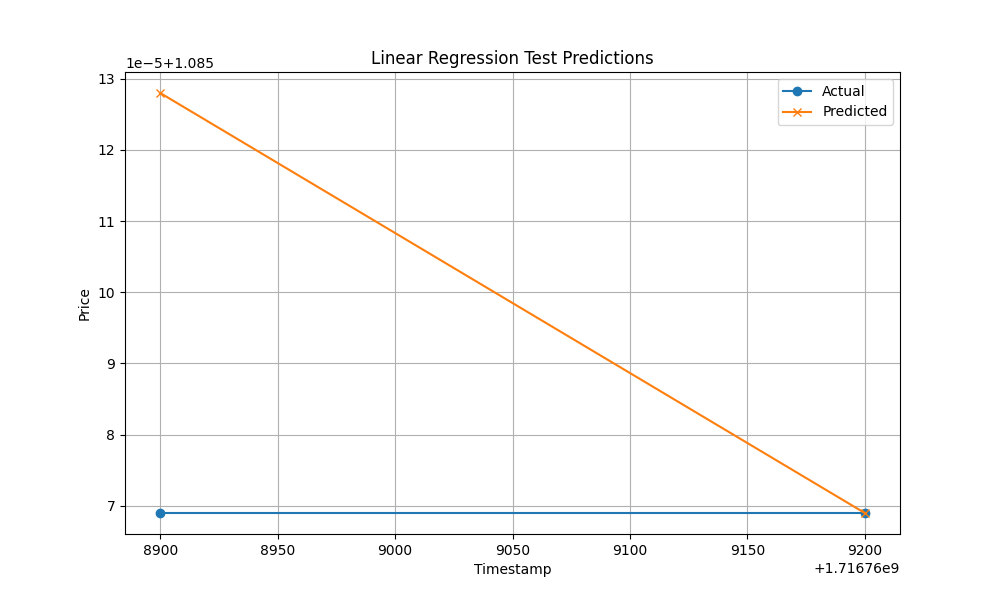
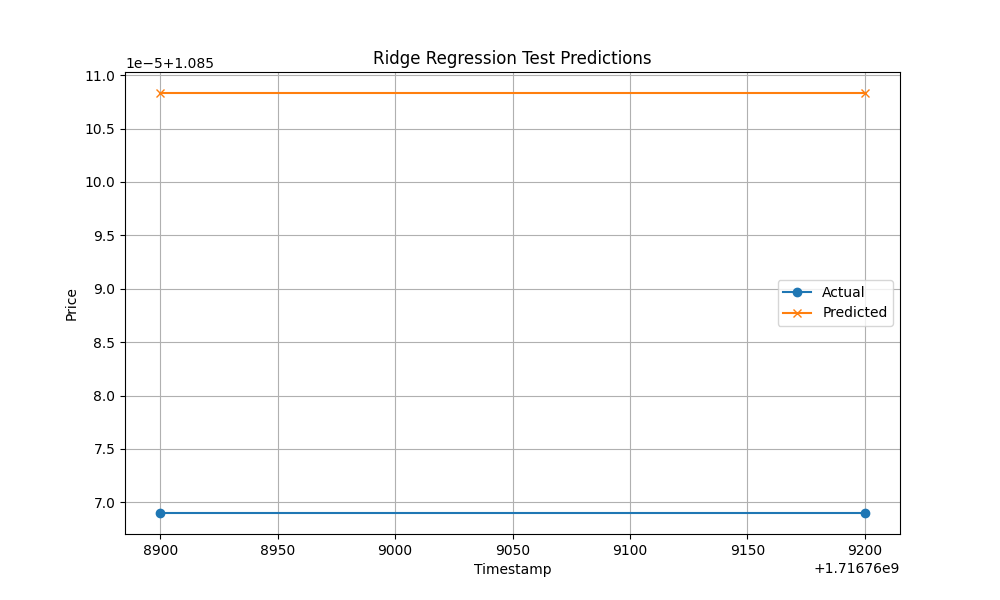
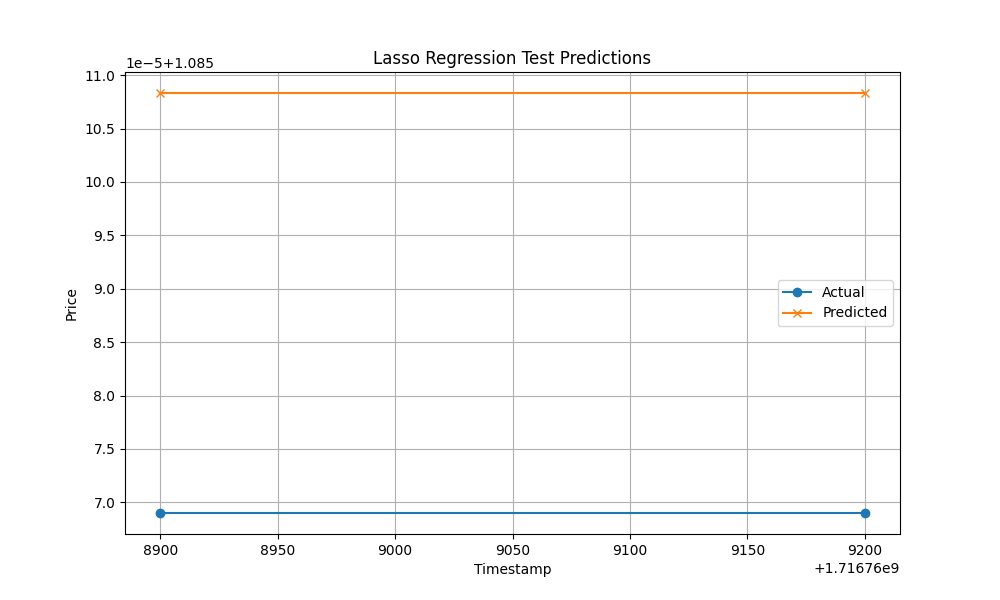
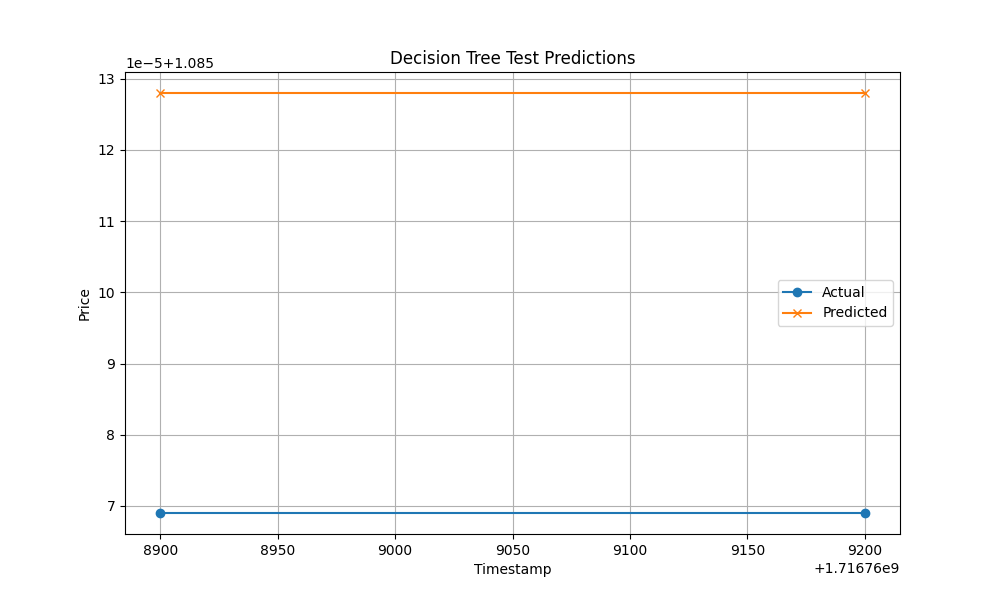

In [ ]:
import uuid
from datetime import date
import matplotlib.pyplot as plt
import os
import base64
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import model_card_toolkit as mct

# 1. Prepare Sample Dataset
data = pd.DataFrame([
    {"timestamp": 1716768000, "open": 1.084951, "high": 1.085069, "low": 1.084951, "close": 1.085069},
    {"timestamp": 1716768300, "open": 1.085187, "high": 1.085187, "low": 1.085069, "close": 1.085187},
    {"timestamp": 1716768600, "open": 1.085187, "high": 1.085187, "low": 1.085069, "close": 1.085069},
    {"timestamp": 1716768900, "open": 1.085187, "high": 1.085187, "low": 1.085069, "close": 1.085069},
    {"timestamp": 1716769200, "open": 1.085069, "high": 1.085069, "low": 1.085069, "close": 1.085069},
])

# Features (Open, High, Low)
X = data[['open', 'high', 'low']]
# Target (Close)
y = data['close']

# Split data into train and test sets
X_train, X_test = X[:3], X[3:]
y_train, y_test = y[:3], y[3:]

# 2. Model Training and Prediction for Multiple Algorithms
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluation metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    results[model_name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_mae': train_mae,
        'test_mae': test_mae,
    }


# 4. Plotting Predictions vs Actual Values for Each Model
def plot_model_predictions(model_name, actual, predicted, title, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(data['timestamp'][3:], actual, label='Actual', marker='o')
    plt.plot(data['timestamp'][3:], predicted, label='Predicted', marker='x')
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Save plot
    plot_path = f'plots/{filename}.png'
    plt.savefig(plot_path)
    plt.close()

    return plot_path

# Create directory for plots if not exists
if not os.path.exists('plots'):
    os.makedirs('plots')

# Plot predictions for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    plot_model_predictions(model_name, y_test, y_pred_test, f'{model_name} Test Predictions', f'{model_name.lower().replace(" ", "_")}_test_plot')

# 5. Generate Model Card
toolkit = mct.ModelCardToolkit()

# Create a new model card scaffold
model_card = toolkit.scaffold_assets()

# Add Model Details
model_card.model_details.name = 'Stock Price Prediction Models'
model_card.model_details.overview = (
    'This model compares multiple regression algorithms for predicting the closing price of a stock based on historical open, high, low, and close prices.'
)
model_card.model_details.owners = [
    mct.Owner(name='Data Science Team', contact='datascience@finance.com')
]
model_card.model_details.references = [
    mct.Reference(reference='https://scikit-learn.org/stable/')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

# Add Ethical Considerations
model_card.considerations.limitations = [
    mct.Limitation(description='These models do not account for external factors like market news or financial events.')
]
model_card.considerations.use_cases = [
    mct.UseCase(description='Stock price prediction for short-term trading.')
]
model_card.considerations.users = [
    mct.User(description='Financial analysts'),
    mct.User(description='Traders')
]

# Add Performance Metrics for Each Model
for model_name, metrics in results.items():
    model_card.quantitative_analysis.performance_metrics.append(
        mct.PerformanceMetric(type=f'{model_name} MeanSquaredError', value=str(metrics['test_mse']))
    )
    model_card.quantitative_analysis.performance_metrics.append(
        mct.PerformanceMetric(type=f'{model_name} MeanAbsoluteError', value=str(metrics['test_mae']))
    )

# Performance Plots (Predicted vs Actual for Each Model)
model_card.quantitative_analysis.graphics = mct.GraphicsCollection(
    description='Comparison of predicted vs actual stock prices for different models',
    collection=[
        mct.Graphic(image=image_to_base64(f'plots/{model_name.lower().replace(" ", "_")}_test_plot.png')) for model_name in models.keys()
    ]
)

# Finalize and generate the model card
toolkit.update_model_card(model_card)

# Export the model card as HTML content
html_content = toolkit.export_format()

# Save the HTML content to a file
html_file_path = 'model_card_mutiple_algorithom.html'
with open(html_file_path, 'w') as f:
    f.write(html_content)

print(f"Model Card HTML saved to: {html_file_path}")

# Display Model Card in Notebook (for Jupyter)
from IPython.display import display, HTML
display(HTML(html_content))
